In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_squared_error, r2_score

# Encoder
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
import category_encoders as ce

from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer

import warnings
warnings.filterwarnings('ignore')

In [5]:
df = sns.load_dataset('mpg')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [6]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [8]:
# df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 25.0+ KB


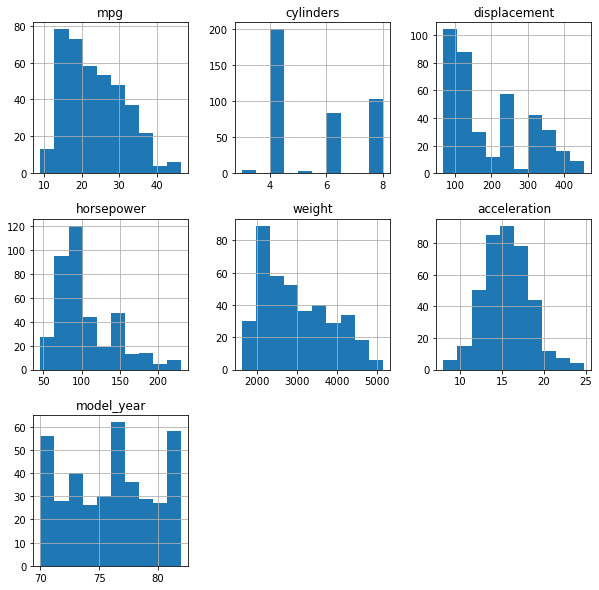

In [7]:
df.hist(figsize=(10, 10));

Features to be used:
- cylinders
- horsepower
- origin
- model_year

**Modeling**

In [7]:
df.drop('name', axis=1, inplace=True)

In [13]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_japan,origin_usa
0,18.0,8,307.0,130.0,3504,12.0,70,0,1
1,15.0,8,350.0,165.0,3693,11.5,70,0,1
2,18.0,8,318.0,150.0,3436,11.0,70,0,1
3,16.0,8,304.0,150.0,3433,12.0,70,0,1
4,17.0,8,302.0,140.0,3449,10.5,70,0,1


In [13]:
transformer = ColumnTransformer([
                                 ('encoder', OneHotEncoder(drop='first'), ['origin'])
                                ])

In [14]:
df_encoded = pd.DataFrame(transformer.fit_transform(df))
df_encoded = df_encoded.astype(int)
df_encoded

,0,1
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
393,0,1
394,0,0
395,0,1
396,0,1


In [15]:
transformer.get_feature_names()

['encoder__x0_japan', 'encoder__x0_usa']

In [24]:
df[df['horsepower'].isna()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
32,25.0,4,98.0,NaN,2046,19.0,71,usa
126,21.0,6,200.0,NaN,2875,17.0,74,usa
330,40.9,4,85.0,NaN,1835,17.3,80,europe
336,23.6,4,140.0,NaN,2905,14.3,80,usa
354,34.5,4,100.0,NaN,2320,15.8,81,europe
374,23.0,4,151.0,NaN,3035,20.5,82,usa


In [32]:
df[df['horsepower'].isna()].index

Int64Index([32, 126, 330, 336, 354, 374], dtype='int64')

In [35]:
# KNN imputer
knn_imputer = KNNImputer()
pd.DataFrame(knn_imputer.fit_transform(df[['cylinders', 'displacement', 'horsepower', 'weight',
                                    'acceleration', 'model_year']])).iloc[df[df['horsepower'].isna()].index]


,0,1,2,3,4,5
32,4.0,98.0,62.0,2046.0,19.0,71.0
126,6.0,200.0,107.6,2875.0,17.0,74.0
330,4.0,85.0,58.2,1835.0,17.3,80.0
336,4.0,140.0,112.8,2905.0,14.3,80.0
354,4.0,100.0,80.8,2320.0,15.8,81.0
374,4.0,151.0,88.2,3035.0,20.5,82.0


In [36]:
df['horsepower'].value_counts()

150.0    22
90.0     20
88.0     19
110.0    18
100.0    17
         ..
61.0      1
93.0      1
148.0     1
152.0     1
82.0      1
Name: horsepower, Length: 93, dtype: int64

In [14]:
# Define X and y
X = df[['cylinders', 'horsepower', 'origin_japan', 'origin_usa', 'model_year']]
y = df['mpg']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
                                                    X, 
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42
)

In [18]:
X_train

,cylinders,horsepower,origin_japan,origin_usa,model_year
260,6,110.0,0,1,78
184,4,92.0,0,1,76
174,6,97.0,0,1,75
64,8,150.0,0,1,72
344,4,64.0,0,1,81
...,...,...,...,...,...
72,8,150.0,0,1,72
107,6,100.0,0,1,73
272,4,85.0,0,1,78
352,4,65.0,0,1,81


In [19]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
X_train_scaled

array([[ 0.30486156,  0.14142863, -0.50199602,  0.74128601,  0.49452752],
       [-0.87318372, -0.32949862, -0.50199602,  0.74128601, -0.0572982 ],
       [ 0.30486156, -0.19868549, -0.50199602,  0.74128601, -0.33321105],
       ...,
       [-0.87318372, -0.51263699, -0.50199602,  0.74128601,  0.49452752],
       [-0.87318372, -1.0358895 , -0.50199602,  0.74128601,  1.32226608],
       [ 1.48290683,  1.18793363, -0.50199602,  0.74128601, -0.88503677]])

In [58]:
# Define models
linreg = LinearRegression()
ridge = Ridge(random_state=42, alpha=0.1)
lasso = Lasso(random_state=42, alpha=0.1)
tree_reg = DecisionTreeRegressor(random_state=42, max_depth=3)
knn_reg = KNeighborsRegressor(n_neighbors=7)

In [59]:
# Fitting model
linreg.fit(X_train_scaled, y_train)
ridge.fit(X_train_scaled, y_train)
lasso.fit(X_train_scaled, y_train)
tree_reg.fit(X_train_scaled, y_train)
knn_reg.fit(X_train_scaled, y_train)

KNeighborsRegressor(n_neighbors=7)

In [60]:
# Predict

models = [linreg, ridge, lasso, tree_reg, knn_reg]

for model in models:
    print('================================')
    print(model.__class__.__name__)
    print()

    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    print('Train set r-squared:', model.score(X_train_scaled, y_train))
    print('Test set r-squared:', model.score(X_test_scaled, y_test))
    print()
    print('Train set RMSE:', np.sqrt(mean_squared_error(y_train, y_train_pred)))
    print('Test set RMSE:', np.sqrt(mean_squared_error(y_test, y_test_pred)))

LinearRegression

Train set r-squared: 0.7710346375711428
Test set r-squared: 0.7281543130551544

Train set RMSE: 3.8010072026079733
Test set RMSE: 3.724937907255205
Ridge

Train set r-squared: 0.771034623484159
Test set r-squared: 0.7281798412327323

Train set RMSE: 3.8010073195355405
Test set RMSE: 3.7247630045191
Lasso

Train set r-squared: 0.7707274002485054
Test set r-squared: 0.7334534863710975

Train set RMSE: 3.8035565396985427
Test set RMSE: 3.688453539923191
DecisionTreeRegressor

Train set r-squared: 0.8277869587175801
Test set r-squared: 0.7548750315381059

Train set RMSE: 3.296452459613915
Test set RMSE: 3.5371346252226092
KNeighborsRegressor

Train set r-squared: 0.8720685696716246
Test set r-squared: 0.8130583783023375

Train set RMSE: 2.841204058732476
Test set RMSE: 3.0889495630804613


In [61]:
lasso.coef_

array([-2.20335682, -2.39830329,  0.69649449, -1.1476724 ,  2.43823117])

In [62]:
lasso.intercept_

23.59936102236422

In [63]:
ridge.coef_

array([-2.20730672, -2.42632966,  0.74110616, -1.19261744,  2.50950648])